## Instructions

For your first project, you are asked to

1) Identify and load a network dataset that has some categorical information available for each node.
2) For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
3) Compare your centrality measures across your categorical groups.

### Dataset

This is who-trusts-whom network of people who trade using Bitcoin on a platform called Bitcoin OTC. Since Bitcoin users are anonymous, there is a need to maintain a record of users' reputation to prevent transactions with fraudulent and risky users. Members of Bitcoin OTC rate other members in a scale of 1 - 5 (distrust) to 6 - 10 (trust) in steps of 1. This is the first explicit weighted signed directed network available for research.

https://snap.stanford.edu/data/soc-sign-bitcoin-alpha.html

### Introduction

Project 1 - Calvin Wong and Tamiko Jenkins

Bitcoin uses peer-to-peer technology to operate with no central authority or banks; managing transactions and the issuing of bitcoins is carried out collectively by the network. To form a distributed timestamp server as a peer-to-peer network, bitcoin uses a proof-of-work system. This work is often called bitcoin mining.

A rough overview of the process to mine bitcoins involves:

1) New transactions are broadcast to all nodes.
2) Each miner node collects new transactions into a block.
3) Each miner node works on finding a proof-of-work code for its block.
4) When a node finds a proof-of-work, it broadcasts the block to all nodes.
5) Receiving nodes validate the transactions it holds and accept only if all are valid.
6) Nodes express their acceptance by moving to work on the next block, incorporating the hash of the accepted block.

Selecting transactions for mining not just based on their fees but also based on the fees of their ancestors (parents) and descendants (children). The data selected contains a parent and child node; and the relationship as viewed by the node. Column 3 represents parent view of child levels - 10 to + 10 (trust or distrust). Column 4 represents a timestamp which we will ingore for now.

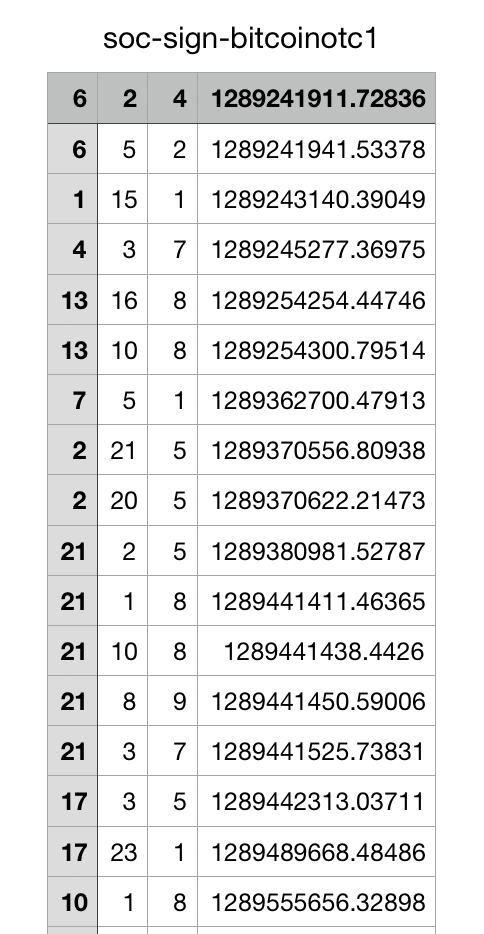

The data will be loaded using python and data will be extracted to create both nodes and edges. Four types of analysis will be performed on this dataset, our conclusion will be derived from degree centrality, eigenvector centrality, betweenness centrality and possible closeness centrality.

Data format                                                                
Each line has one rating with the following format:                        
                                                                           
    SOURCE, TARGET, RATING, TIME                                           
                                                                           
where                                                                      
                                                                           
    SOURCE: node id of source, i.e., rater                                 
    TARGET: node id of target, i.e., ratee                                 
    RATING: the source's rating for the target,                            
            ranging from -10 to +10 in steps of 1                          
    TIME: the time of the rating, measured as seconds since Epoch.    

Degree centrality assigns an importance score based simply on the number of links held by each node. We will determine if the importance scores impact trust/distrust results.

Betweenness centrality measures the number of times a node lies on the shortest path between other nodes. We will analyze if trust/distrust scores on bridge paths impact the outcome of child.

Closeness centrality and eigenvector centrality scores each node based on their ‘closeness’ to all other nodes in the network. We will see if closeness impact trust/distrust outcomes. Perhaps trusted nodes are centered around other trusted nodes.

In [93]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from operator import itemgetter
import networkx as nx
import numpy as np
import pandas as pd
from pandas import DataFrame

In [19]:
data = pd.read_csv('soc-sign-bitcoinotc1.csv', names=['SOURCE', 'TARGET', 'RATING', 'TIME'])
print('shape:', data.shape)
print('columns:', data.columns)
print('basic info:', data.info())

shape: (1500, 4)
columns: Index(['SOURCE', 'TARGET', 'RATING', 'TIME'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 4 columns):
SOURCE    1500 non-null int64
TARGET    1500 non-null int64
RATING    1500 non-null int64
TIME      1500 non-null float64
dtypes: float64(1), int64(3)
memory usage: 47.0 KB
basic info: None


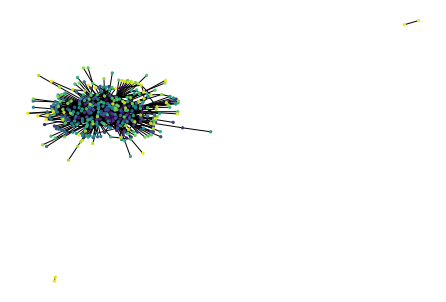

In [18]:
new_data = data.iloc[:, :3].copy()
G = nx.from_pandas_edgelist(new_data, "SOURCE", "TARGET", "RATING")
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color=range(381), node_size=5, edge_vmin=1, edge_vmax=2)

Basic view of the network. Due to processing capacity, I had to remove three quarters of the original csv file. It had 10000+ points. There is now only 2500 points of data.

In [5]:
rating = {}
nx.set_node_attributes(G, rating, 'RATING')

In [6]:
nx.info(G)

'Name: \nType: Graph\nNumber of nodes: 381\nNumber of edges: 874\nAverage degree:   4.5879'

Here is some basic information of the network. 

In [7]:
components = nx.connected_components(G)
largest_component = max(components, key=len)

subgraph = G.subgraph(largest_component)

diameter = nx.diameter(subgraph)
print("Network diameter of largest component:", diameter)

Network diameter of largest component: 7


In [8]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 20 nodes by degree:")
for d in sorted_degree[:20]:
    print(d)

Top 20 nodes by degree:
(7, 102)
(1, 71)
(60, 70)
(202, 44)
(257, 39)
(41, 32)
(132, 26)
(2, 23)
(29, 22)
(64, 22)
(104, 21)
(149, 20)
(4, 18)
(77, 18)
(62, 18)
(21, 17)
(39, 16)
(143, 16)
(35, 15)
(135, 15)


In [9]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality

nx.set_node_attributes(G, betweenness_dict, 'betweenness')
nx.set_node_attributes(G, eigenvector_dict, 'eigenvector')

In [10]:
sorted_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 nodes by betweenness centrality:")
for b in sorted_betweenness[:10]:
    print(b)

Top 10 nodes by betweenness centrality:
(7, 0.3495082750460998)
(60, 0.1991120382635981)
(1, 0.17460447458763292)
(202, 0.11260461715718768)
(257, 0.09739413221601304)
(41, 0.08407916281257288)
(29, 0.05329657018228831)
(64, 0.04560469716078043)
(35, 0.04072614499229919)
(104, 0.035432100795854904)


In [11]:
sorted_eigenvector = sorted(eigenvector_dict.items(), key=itemgetter(1), reverse=True)

print("Top 10 nodes by eigenvector centrality:")
for b in sorted_eigenvector[:10]:
    print(b)

Top 10 nodes by eigenvector centrality:
(7, 0.4438609462250807)
(1, 0.3104407091800801)
(60, 0.2754900711291625)
(2, 0.17920551453902006)
(202, 0.16892688355805405)
(41, 0.1373666796997756)
(132, 0.13703151524644847)
(21, 0.13534185231427992)
(29, 0.12738397496158457)
(110, 0.12183012871030538)


Betweenness centrality measures how important a node is to the shortest paths through the network. Whereas, Eigenvector centrality is a more sophisticated view of centrality: a node with a few connections could have a very high eigenvector centrality if those few connections were to very well-connected others. We can see some similarities within both measures.

In [12]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.012073490813648294


Network density is the ratio of actual edges in the network to all possible edges in the network. Network density gives a quick sense of how closely knit this network is. In this case, the density of this network is approximately 0.012. On a scale of 0 to 1, not a very dense network. A 0 would mean that there are no connections at all, and a 1 would indicate that all possible edges are present.

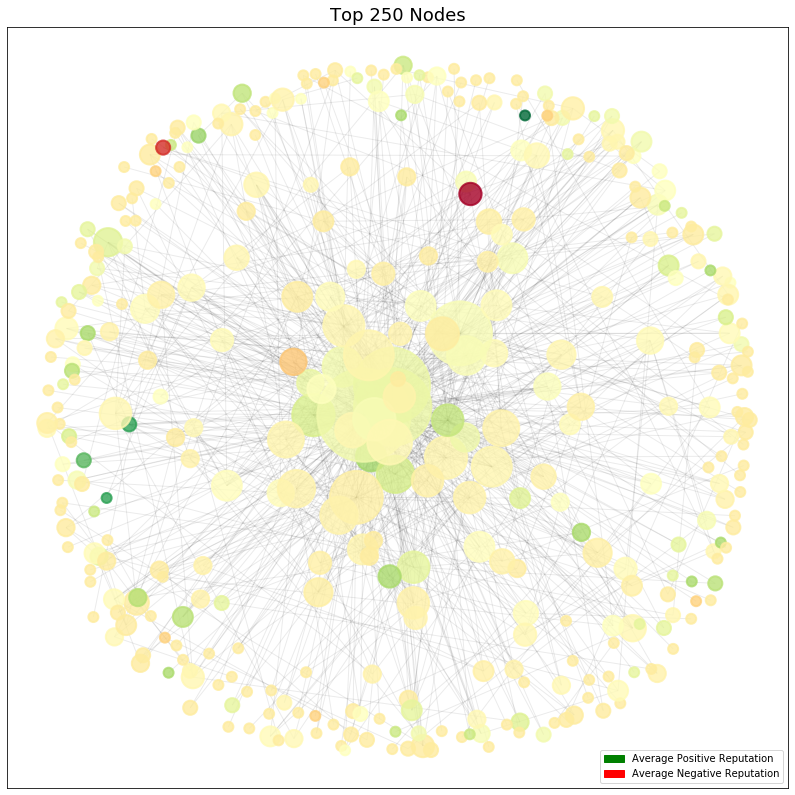

In [13]:
review_counts = data.groupby('TARGET').RATING.count()
average_reviews = data.groupby('TARGET').RATING.mean()

def get_size(user_id, m=250, min=100):
    s = review_counts.get(user_id)
    if s is not None:
        return min * s
    else:
        return min

def get_color(user_id):
    s = average_reviews.get(user_id)
    if s is None:
        return 0.5
    return np.interp(s, (-10, 10), (0, 1))

plt.figure(figsize=(14, 14)) 
plt.title("Top 250 Nodes", fontsize=18)

untrusted = mpatches.Patch(color='red', label='Average Negative Reputation') # For untrusted nodes
trusted = mpatches.Patch(color='green', label='Average Positive Reputation') # For trusted nodes
plt.legend(handles=[trusted, untrusted], loc='lower right')

pos = nx.spring_layout(G, k=0.8)
sizes = [get_size(n) for n in G]
colors = [get_color(n) for n in G]

nc = nx.draw_networkx_nodes(
    G, pos, nodelist=G.nodes(), node_size=sizes, linewidths=2.0,
    node_color=colors, cmap=plt.cm.RdYlGn, alpha=0.8)
ec = nx.draw_networkx_edges(G, pos, arrows=True, alpha=0.08)
ax = plt.axis('on')
plt.show()


Top 250 Nodes

Node color: Average positivity (green) to negativity (red) of node reviews
Edge length: Closer nodes designates trust while nodes further from each other denotes mistrust
Position: Fruchterman-Reingold force-directed algorithm
We expect trusted nodes to transact more with each other, cluster together, appear larger, and have on average more positive reviews and thus shorter edges. 

Nodes with lower trust should appear smaller and have longer edges. With the force-directed algorithm, these should be farther away from trusted clusters.

### Observations

- Larger nodes appear to cluster together as expected
- Larger nodes seem generally have a zero to positive trust ranking
- The larger nodes seem to have a generally trusting sentiment of each other


### T-TEST

Let us see if in fact the visualization above demonstrates the overall network sentiment, this is because the graph reviews just the top 250 nodes. We will group the network into two sets, a distrust and trust network. We will then perform a t-test to determine if there is a significant difference between the centrality measures of these two groups.

In [58]:
data_distrust = new_data[new_data['RATING'] <= 4].copy(deep=True)
data_trust = new_data[new_data['RATING'] >= 5].copy(deep=True)

In [63]:
data_distrust = data_distrust.reset_index()
del data_distrust['index']
data_trust = data_trust.reset_index()
del data_trust['index']

G_data_distrust = nx.from_pandas_edgelist(data_distrust, "SOURCE", "TARGET", "RATING")
G_data_trust = nx.from_pandas_edgelist(data_trust, "SOURCE", "TARGET", "RATING")

In [64]:
data_distrust.count

<bound method DataFrame.count of       SOURCE  TARGET  RATING
0          6       2       4
1          6       5       2
2          1      15       1
3          7       5       1
4         17      23       1
...      ...     ...     ...
1362     298     446       1
1363     446     298       1
1364     214     443       2
1365     257     309       3
1366     443     214       2

[1367 rows x 3 columns]>

In [65]:
data_trust.count

<bound method DataFrame.count of      SOURCE  TARGET  RATING
0         4       3       7
1        13      16       8
2        13      10       8
3         2      21       5
4         2      20       5
..      ...     ...     ...
128     257     372       6
129       7     270       5
130     257     105       6
131       1     144       5
132     144       1       5

[133 rows x 3 columns]>

In [75]:
data_distrust_betweenness_dict = nx.betweenness_centrality(G_data_distrust) # Run betweenness centrality for distrust
data_trust_betweenness_dict = nx.betweenness_centrality(G_data_trust) # Run betweenness centrality for trust

data_distrust_eigenvector_dict = nx.eigenvector_centrality(G_data_distrust) # Run eigenvector centrality for distrust
data_trust_eigenvector_dict = nx.eigenvector_centrality(G_data_trust) # Run eigenvector centrality for trust

In [97]:
distrust_sorted_betweenness = sorted(data_distrust_betweenness_dict.items(), key=itemgetter(1), reverse=True)
distrust_sorted_betweenness = DataFrame(distrust_sorted_betweenness, columns=['Node', 'Betweenness'])

In [98]:
trust_sorted_betweenness = sorted(data_trust_betweenness_dict.items(), key=itemgetter(1), reverse=True)
trust_sorted_betweenness = DataFrame(trust_sorted_betweenness, columns=['Node', 'Betweenness'])

In [99]:
distrust_sorted_eigenvector = sorted(data_distrust_eigenvector_dict.items(), key=itemgetter(1), reverse=True)    
distrust_sorted_eigenvector = DataFrame(distrust_sorted_eigenvector, columns=['Node', 'Eigenvenctor'])

In [100]:
trust_sorted_eigenvector = sorted(data_trust_eigenvector_dict.items(), key=itemgetter(1), reverse=True)
trust_sorted_eigenvector = DataFrame(trust_sorted_eigenvector,columns=['Node', 'Eigenvenctor'])

In [121]:
betweenness_diff = pd.merge(left = distrust_sorted_betweenness, right = trust_sorted_betweenness , on='Node', suffixes=['_l', '_r'])

In [123]:
betweenness_diff['difference'] = betweenness_diff.apply(lambda row: abs(row['Betweenness_l']-row['Betweenness_r']), axis=1)

In [126]:
from scipy.stats import ttest_1samp
ttest_1samp(betweenness_diff['difference'], 0)

Ttest_1sampResult(statistic=4.767753865880729, pvalue=8.35507152430528e-06)

### Results Betweenness Centrality between Trust/Distrust Nodes

- Test if mean difference of distrust and trust betweenness centrality is zero

Null Hypothesis:
The mean difference between distrust and trust betweenness centrality for each node is zero.

Alternative Hypothesis:
The mean difference between distrust and trust betweenness centrality for each node is not zero.

### Reject null hypothesis

Since the pvalue (8.35507152430528e-06) is lesser than 0.05. We reject the null hypothesis.

Assuming that the null hypothesis is true (mean is zero), the probability of observing the data that we have is very small.

Hence we conclude that there is a difference in the betweenness centrality between trusted and not trusted nodes.

In [127]:
eigenvector_diff = pd.merge(left = distrust_sorted_eigenvector, right = trust_sorted_eigenvector , on='Node', suffixes=['_l', '_r'])

In [130]:
eigenvector_diff['difference'] = eigenvector_diff.apply(lambda row: abs(row['Eigenvenctor_l']-row['Eigenvenctor_r']), axis=1)

In [131]:
ttest_1samp(eigenvector_diff['difference'], 0)

Ttest_1sampResult(statistic=8.19508591107443, pvalue=3.6318111552523028e-12)

### Results Eigenvector Centrality between Trust/Distrust Nodes

- Test if mean difference of distrust and trust eigenvector centrality is zero

Null Hypothesis:
The mean difference between distrust and trust eigenvector centrality for each node is zero.

Alternative Hypothesis:
The mean difference between distrust and trust eigenvector centrality for each node is not zero.

### Reject null hypothesis

Since the pvalue (3.6318111552523028e-12) is less than 0.05. We reject the null hypothesis.

Assuming that the null hypothesis is true (mean is zero), the probability of observing the data that we have is very small.

Hence we conclude that there is a difference in the eigenvector centrality between trusted and not trusted nodes.

## Source

* S. Kumar, F. Spezzano, V.S. Subrahmanian, C. Faloutsos. Edge Weight Prediction in Weighted Signed Networks. IEEE International Conference on Data Mining (ICDM), 2016.

* S. Kumar, B. Hooi, D. Makhija, M. Kumar, V.S. Subrahmanian, C. Faloutsos. REV2: Fraudulent User Prediction in Rating Platforms. 11th ACM International Conference on Web Searchand Data Mining (WSDM), 2018.